# Messy Midterm 

Get the data into a dataframe:

In [2]:
import pandas as pd 

df = pd.read_csv("Delaware_Coastal_Cleanup_Results.csv") 
    
df.head()
    

,County,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,...,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
0,Kent,"(39.102739, -75.402356)",Beach,09/20/2008,Kitts Hummock,NaN,NaN,45,1500.0,1.0,...,15.0,NaN,NaN,NaN,11.0,70.0,1.0,NaN,4.0,3.0
1,Kent,"(39.085748, -75.421875)",Beach,09/20/2008,Ted Harvey WLA/ Ted Harvey Wildlife Area,NaN,NaN,45,165.0,2.0,...,NaN,NaN,NaN,NaN,4.0,33.0,2.0,NaN,NaN,NaN
2,New Castle,"(39.738765, -75.53939)",Beach,09/20/2008,E. 7th Street - Barbiarz Park,NaN,NaN,18,180.0,1.0,...,NaN,NaN,NaN,NaN,20.0,NaN,2.0,4.0,3.0,NaN
3,New Castle,"(39.664715, -75.557785)",Beach,09/20/2008,Battery Park,NaN,NaN,51,892.0,0.5,...,48.0,NaN,NaN,NaN,37.0,12.0,2.0,0.0,19.0,0.0
4,New Castle,"(39.504724, -75.580976)",Beach,09/20/2008,Augustine Beach Boat Ramp,NaN,NaN,70,2200.0,1.0,...,5.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,2.0,NaN


I want to get some general information to help me better understand the data set

In [5]:
df["County"].value_counts()

Sussex        277
Kent          139
New Castle     78
Name: County, dtype: int64

In [6]:
df["Cleanup Type"].value_counts()

Beach                                 312
Land (beach, shoreline and inland)    180
Watercraft                              2
Name: Cleanup Type, dtype: int64

Mostly beach and land, just 2 by watercraft

In [7]:
df["Cleanup Site"].value_counts()

Bethany Beach                             13
Battery Park                              12
Fenwick Island State Park                 12
Rehoboth Beach                            12
Dewey Beach                               12
                                          ..
Towers Beach                               1
Cape Henlopen-Gordon's Pond State Park     1
Broadkill                                  1
C&D Canal - St Georges                     1
Ted Harvey                                 1
Name: Cleanup Site, Length: 138, dtype: int64

In [8]:
df["Cleanup Date"].value_counts()

09/16/2017    47
09/17/2016    46
09/19/2015    46
09/20/2014    45
09/14/2019    44
09/21/2013    42
09/22/2018    39
09/15/2012    37
09/17/2011    37
09/25/2010    35
09/19/2009    34
09/20/2008    30
09/18/2011     1
09/24/2016     1
09/27/2015     1
10/04/2008     1
09/13/2014     1
09/12/2009     1
06/18/2010     1
11/12/2008     1
10/10/2012     1
09/13/2019     1
09/16/2016     1
09/15/2017     1
Name: Cleanup Date, dtype: int64

Looks like from 2008 to 2019 there's a big cleanup day in September at lots of different locations, and a few other days scattered about at individual sites

In [9]:
df["People"].mean()

42.27732793522267

array([[<AxesSubplot:title={'center':'People'}>]], dtype=object)

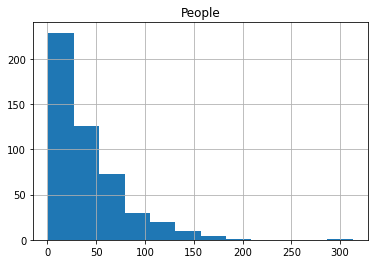

In [17]:
df.hist(column = "People", bins=12)

In [22]:
df["Pounds"].mean()

275.2849190283401

array([[<AxesSubplot:title={'center':'Pounds'}>]], dtype=object)

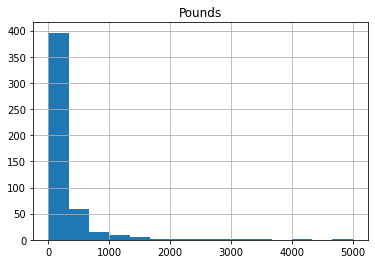

In [25]:
df.hist(column = "Pounds", bins=15)

In [3]:
allCols = list(df)
allCols

['County',
 'Location Lat-Long',
 'Cleanup Type',
 'Cleanup Date',
 'Cleanup Site',
 'Adults',
 'Children',
 'People',
 'Pounds',
 'Miles',
 'Bags',
 'Cigarette Butts',
 'Food Wrappers',
 'Take Out/Away Containers (Plastic)',
 'Take Out/Away Containers (Foam)',
 'Bottle Caps (Plastic)',
 'Bottle Caps (Metal)',
 'Lids (Plastic)',
 'Straws, Stirrers',
 'Forks, Knives, Spoons',
 'Beverage Bottles (Plastic)',
 'Beverage Bottles (Glass)',
 'Beverage Cans',
 'Grocery Bags (Plastic)',
 'Other Plastic Bags',
 'Paper Bags',
 'Cups, Plates (Paper)',
 'Cups, Plates (Plastic)',
 'Cups, Plates (Foam)',
 'Fishing Buoys, Pots & Traps',
 'Fishing Net & Pieces',
 'Fishing Line',
 'Rope',
 '6-Pack Holders',
 'Other Plastic/Foam Packaging',
 'Other Plastic Bottles',
 'Strapping Bands',
 'Tobacco Packaging/Wrap',
 'Appliances',
 'Balloons',
 'Cigar Tips',
 'Cigarette Lighters',
 'Construction Materials',
 'Fireworks',
 'Tires',
 'Toys',
 'Condoms',
 'Diapers',
 'Syringes',
 'Tampons/Tampon Applicators',
 

In [23]:
#Smoking related: 'Cigarette Butts', 'Tobacco Packaging/Wrap', 'Cigar Tips', 'Cigarette Lighters'
smokingdf = df[['Cleanup Date','Cigarette Butts', 'Tobacco Packaging/Wrap', 'Cigar Tips', 'Cigarette Lighters']];
smokingdf

,Cleanup Date,Cigarette Butts,Tobacco Packaging/Wrap,Cigar Tips,Cigarette Lighters
0,09/20/2008,8.0,4.0,16.0,27.0
1,09/20/2008,4.0,NaN,NaN,5.0
2,09/20/2008,172.0,11.0,4.0,8.0
3,09/20/2008,541.0,25.0,163.0,43.0
4,09/20/2008,75.0,5.0,9.0,7.0
...,...,...,...,...,...
489,09/14/2019,300.0,100.0,10.0,5.0
490,09/14/2019,17.0,12.0,0.0,0.0
491,09/14/2019,762.0,20.0,59.0,6.0
492,09/14/2019,109.0,21.0,12.0,2.0


In [25]:
listOfSmokingColumns = ['Cleanup Date','Cigarette Butts', 'Tobacco Packaging/Wrap', 'Cigar Tips', 'Cigarette Lighters'];
totalsmoke = df[listOfSmokingColumns].sum(axis=1);
smokingdf['total smoking items'] = totalsmoke;
smokingdf

<ipython-input-25-65fd65236513>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokingdf['total smoking items'] = totalsmoke;


,Cleanup Date,Cigarette Butts,Tobacco Packaging/Wrap,Cigar Tips,Cigarette Lighters,total smoking items
0,09/20/2008,8.0,4.0,16.0,27.0,55.0
1,09/20/2008,4.0,NaN,NaN,5.0,9.0
2,09/20/2008,172.0,11.0,4.0,8.0,195.0
3,09/20/2008,541.0,25.0,163.0,43.0,772.0
4,09/20/2008,75.0,5.0,9.0,7.0,96.0
...,...,...,...,...,...,...
489,09/14/2019,300.0,100.0,10.0,5.0,415.0
490,09/14/2019,17.0,12.0,0.0,0.0,29.0
491,09/14/2019,762.0,20.0,59.0,6.0,847.0
492,09/14/2019,109.0,21.0,12.0,2.0,144.0


NameError: name 'plot' is not defined

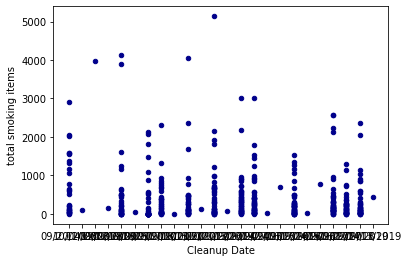

In [53]:
#ax1 = smokingdf.plot.scatter(x='Cleanup Date',
  #                    y='total smoking items',
  #                    c='DarkBlue')



Above, this scatter plot did not work as expected because I did not sum by cleanup date, so there are many points for each of the days

Additionally, I don't want to include days that only collected at one site, I just want to include the big cleanup days

these are the big cleanup day dates, with the number of sites

09/16/2017    47
09/17/2016    46
09/19/2015    46
09/20/2014    45
09/14/2019    44
09/21/2013    42
09/22/2018    39
09/15/2012    37
09/17/2011    37
09/25/2010    35
09/19/2009    34
09/20/2008    30

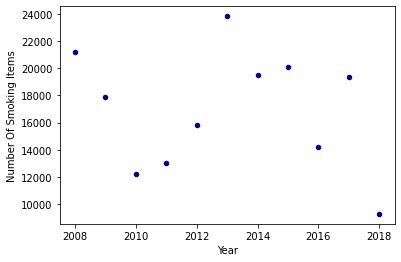

In [60]:
smoke08 = smokingdf[smokingdf['Cleanup Date'] == '09/20/2008'];
smoke08 = smoke08['total smoking items'].sum();

smoke09 = smokingdf[smokingdf['Cleanup Date'] == '09/19/2009'];
smoke09 = smoke09['total smoking items'].sum();

smoke10 = smokingdf[smokingdf['Cleanup Date'] == '09/25/2010'];
smoke10 = smoke10['total smoking items'].sum();

smoke11 = smokingdf[smokingdf['Cleanup Date'] == '09/17/2011'];
smoke11 = smoke11['total smoking items'].sum();

smoke12 = smokingdf[smokingdf['Cleanup Date'] == '09/15/2012'];
smoke12 = smoke12['total smoking items'].sum();

smoke13 = smokingdf[smokingdf['Cleanup Date'] == '09/21/2013'];
smoke13 = smoke13['total smoking items'].sum();

smoke14 = smokingdf[smokingdf['Cleanup Date'] == '09/20/2014'];
smoke14 = smoke14['total smoking items'].sum();

smoke15 = smokingdf[smokingdf['Cleanup Date'] == '09/19/2015'];
smoke15 = smoke15['total smoking items'].sum();

smoke16 = smokingdf[smokingdf['Cleanup Date'] == '09/17/2016'];
smoke16 = smoke16['total smoking items'].sum();

smoke17 = smokingdf[smokingdf['Cleanup Date'] == '09/16/2017'];
smoke17 = smoke17['total smoking items'].sum();

smoke18 = smokingdf[smokingdf['Cleanup Date'] == '09/22/2018'];
smoke18 = smoke18['total smoking items'].sum();

smokeyeartotals = [smoke08,smoke09,smoke10,smoke11,smoke12,smoke13,smoke14,smoke15,smoke16,smoke17,smoke18]
smokeyears = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

#df1 = pd.DataFrame(smokeyears);
#df2 = pd.DataFrame(smokeyeartotals)

smoketotalsdfunt = pd.DataFrame([smokeyears,smokeyeartotals]);
smoketotalsdf = smoketotalsdfunt.T;
smoketotalsdf.columns = ['Year', 'Number Of Smoking Items']

smoketotalsdf

ax1 = smoketotalsdf.plot.scatter(x='Year',
                        y='Number Of Smoking Items',
                      c='DarkBlue')

Hmm defnitely not a clear correlation between year and number of smoking-related items retrieved. Let's try to see if the percent of recovered items that are smoking related increases or decreases